# Representación de datos geográficos con `cartopy`

En ocasiones necesitaremos representar datos sobre un mapa. En este tipo de casos `basemap` es una buena alternativa dentro del ecosistema Python, pero pronto [será sustituida](https://matplotlib.org/basemap/users/intro.html#cartopy-new-management-and-eol-announcement) por [`cartopy`](http://scitools.org.uk/cartopy/docs/latest/index.html). Aunque seguirá teniendo mantenimiento hasta 2020 y `cartopy` todavía no ha incorporado todas las características de `basemap`, miraremos al futuro y haremos nuestros primeros ejemplos con la nueva biblioteca. Si aun así te interesa `basemap` puedes ver [esta entrada](http://jakevdp.github.io/blog/2015/08/14/out-of-core-dataframes-in-python/#Diving-Into-the-Data:-Geography-of-Coffee) en el blog de Jake Vanderplas o [este notebook](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.13-Geographic-Data-With-Basemap.ipynb) de su libro sobre data science.

En primer lugar, como siempre importamos la librería y el resto de cosas que necesitaremos:

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Utilizando diferentes proyecciones

### Mercator

Veremos en un primer ejemplo cómo crear un mapa con una proyección y añadiremos la información que nos interese:

<IPython.core.display.Javascript object>


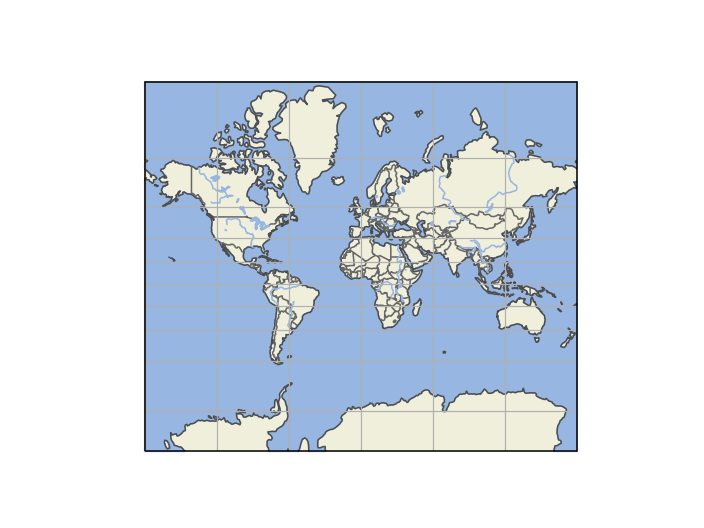

In [2]:
# Inicializamos una figura con el tamaño que necesitemos
# si no la queremos por defecto
plt.figure()

# Creamos unos ejes con la proyección que queramos
# por ejemplo, Mercator
ax = plt.axes(projection=ccrs.Mercator())

# Y lo que queremos representar en el mapa
# Tierra
ax.add_feature(cfeature.LAND)
# Océanos
ax.add_feature(cfeature.OCEAN)
# Líneas de costa (podemos modificar el color)
ax.add_feature(cfeature.COASTLINE, edgecolor=(0.3, 0.3, 0.3))
# Fronteras
ax.add_feature(cfeature.BORDERS, edgecolor=(0.4, 0.4, 0.4))
# Ríos y lagos
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAKES)

# Por último, podemos pintar el grid, si nos interesa
ax.gridlines()

### InterruptedGoodeHomolosine

Veremos ahora otro ejemplo usando una proyección distinta y colorearemos el mapa de forma diferente: 

<IPython.core.display.Javascript object>


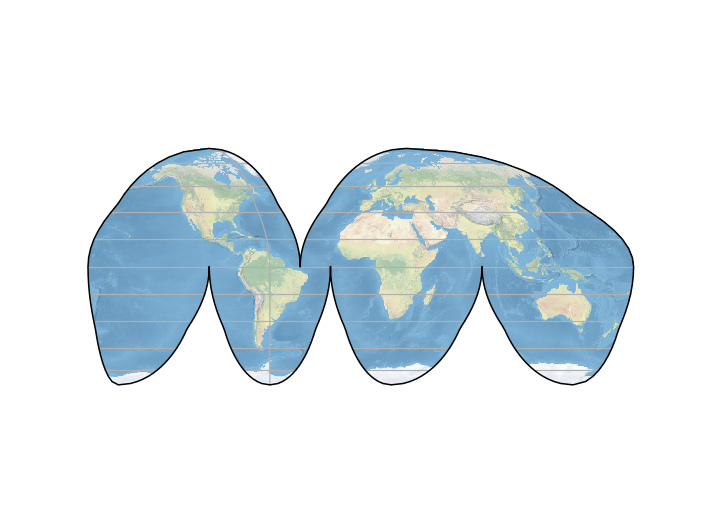

In [3]:
# Inicializamos una figura con el tamaño que necesitemos
# si no la queremos por defecto
plt.figure()

# Elegimos la proyección InterruptedGoodeHomolosine
ax = plt.axes(projection=ccrs.InterruptedGoodeHomolosine())

# Y lo que queremos representar en el mapa
ax.stock_img()

ax.gridlines()

Puede interesarnos poner etiquetas a los ejes. Podemos utilizar entonces las herramientas dentro de : `cartopy.mpl.gridliner`

### PlateCarree

In [4]:
# Importamos los formatos de ejes para latitud y longitud
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

<IPython.core.display.Javascript object>


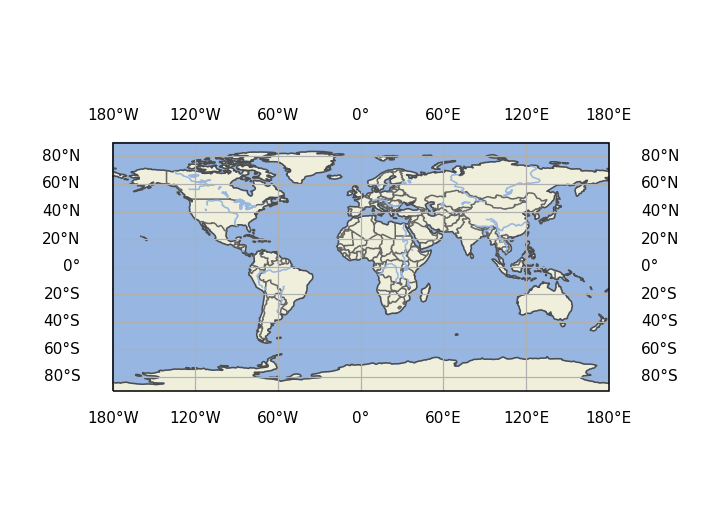

In [5]:
plt.figure()
# Elegimos la proyección PlateCarree
ax = plt.axes(projection=ccrs.PlateCarree())

# Y lo que queremos representar en el mapa
# Tierra
ax.add_feature(cfeature.LAND)
# Océanos
ax.add_feature(cfeature.OCEAN)
# Líneas de costa (podemos modificar el color)
ax.add_feature(cfeature.COASTLINE, edgecolor=(0.3, 0.3, 0.3))
# Fronteras
ax.add_feature(cfeature.BORDERS, edgecolor=(0.4, 0.4, 0.4))
# Ríos y lagos
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAKES)

# Dentro de los ejes seleccionamos las lineas del grid y
# activamos la opción de mostrar etiquetas
gl = ax.gridlines(draw_labels=True)

# Sobre las líneas del grid, ajustamos el formato en x e y
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

## Fijando la extensión de nuestra representación

Para las ocasiones en las que no queremos mostrar un mapa entero, sino que sólo necesitamos representar una determinada localización, vale todo lo anterior, simplemente tendremos espedificar el área a mostrar con el método `set_extent`
y tomar alguna precaución...

<IPython.core.display.Javascript object>


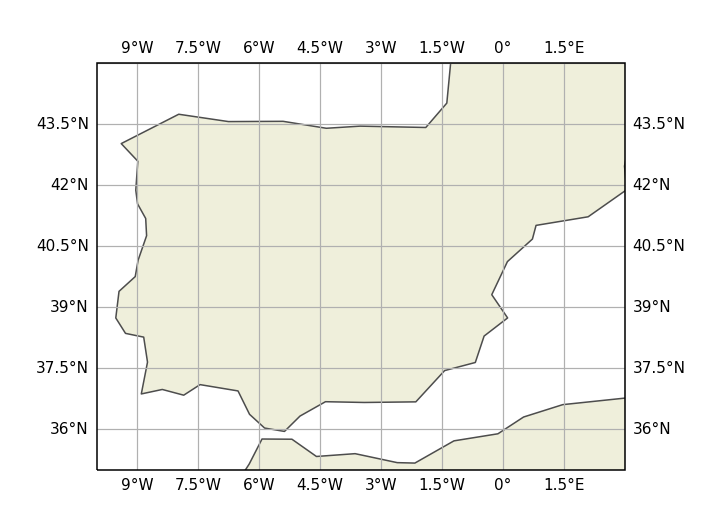

In [6]:
plt.figure()
# Elegimos la proyección
ax = plt.axes(projection=ccrs.PlateCarree())

# Fijar el punto y la extensión del mapa que queremos ver
ax.set_extent([3, -10, 35, 45], ccrs.Geodetic())

# Y lo que queremos representar en el mapa
ax.add_feature(cfeature.COASTLINE,
               edgecolor=(0.3, 0.3, 0.3),
               facecolor=cfeature.COLORS['land']
              )

gl = ax.gridlines(draw_labels=True)

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

Como se ve en la figura enterior, la representación que obtenemos es demasiado burda. Esto se debe a que los datos por defecto se encuentran descargados a una escala poco detallada.

Cartopy permite acceder a datos propios almacenados en nuestro ordenador o descargarlos de algunas bases de datos reconocidas. En este caso accederemos a NaturalEarthFeature, que es la que hemos utilizado por defecto hasta ahora sin saberlo.

Ver http://www.naturalearthdata.com/

In [7]:
# Importando Natural Earth Feature
from cartopy.feature import NaturalEarthFeature

<IPython.core.display.Javascript object>


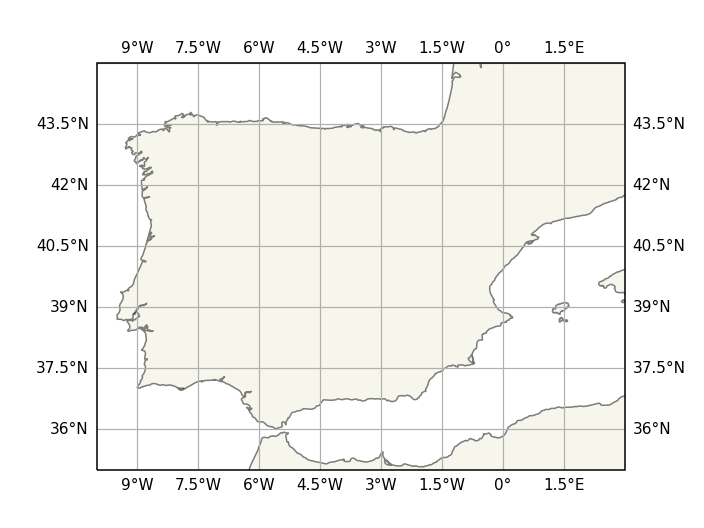

In [8]:
fig = plt.figure()

# Elegimos la proyección
ax = plt.axes(projection=ccrs.PlateCarree())

# Fijar el punto y la extensión del mapa que queremos ver
ax.set_extent([3, -10, 35, 45], ccrs.Geodetic())

# Y lo que queremos representar en el mapa
# Hasta ahora utilizábamos:
# ax.add_feature(cfeature.COASTLINE,
#                edgecolor=(0.3, 0.3, 0.3),
#                facecolor=cfeature.COLORS['land']
#               )

# Pero ahora descargaremos primero la característica que
# queremos representar:
coastline = NaturalEarthFeature(category='physical', name='coastline', scale='10m')

# Y después la añadiremso al mapa con las propiedades que creamos convenientes.
ax.add_feature(coastline,
               facecolor=cfeature.COLORS['land'],
               edgecolor='k',
               alpha=0.5)


gl = ax.gridlines(draw_labels=True)

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

Desde Naturale Earth Feature, no sólo podemos descargar caraterísticas físicas, sino que también podemos acceder a datasets demográficos

In [9]:
import pandas as pd

## Representando datos sobre el mapa 

Habitualmente, no queremos sólo pintar un mapa sino que queremos representar datos sobre él. Estos datos pueden venir del dataset anterior de cualquier otra fuente.

En este ejemplo representaremos los datos de impactos de meteoritos que han caído en la tierra que están recogidos en el dataset: [www.kaggle.como/nasa/meteorite-landings](www.kaggle.como/nasa/meteorite-landings). En el link se pude encontrar toda la información.

In [10]:
# Leeremos el csv que ya tenemos descargado utilizando pandas
import pandas as pd

In [11]:
meteorite = pd.read_csv("../data/meteorite-landings.csv")
meteorite.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [12]:
import numpy as np

<IPython.core.display.Javascript object>


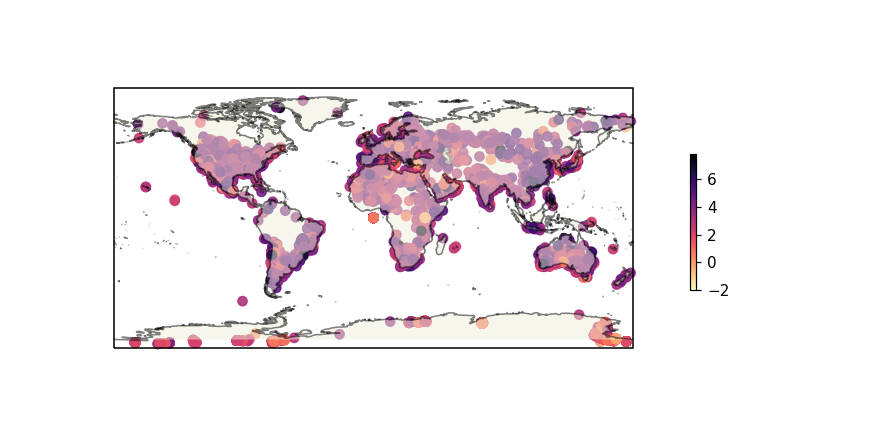

/home/asaez/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


In [13]:
# Cremos un mapa sobre el que representar los datos:
fig = plt.figure(figsize=(8,4))

# Elegimos la proyección PlateCarree
ax = plt.axes(projection=ccrs.PlateCarree())
# Y representamos las líneas de costa
coastline = NaturalEarthFeature(category='physical', name='coastline', scale='50m')
ax.add_feature(coastline, facecolor=cfeature.COLORS['land'], edgecolor='k', alpha=0.5)

# Ahora podemos añadir sobre ese mapa los datos con un scatter
cl = ax.scatter(meteorite.reclong,
                meteorite.reclat,
                c=np.log10(meteorite.mass),
                alpha=0.9,
                cmap=plt.cm.magma_r)

plt.colorbar(cl, shrink=0.400)

Casi cualquier representación de las que hemos cisto anteriormente con `matploltib` es posible. 

---

## Ejemplo de PythonDataScienceHandbook (Jake Vanderplas)

#### https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.13-Geographic-Data-With-Basemap.ipynb

## Example: Surface Temperature Data

As an example of visualizing some more continuous geographic data, let's consider the "polar vortex" that hit the eastern half of the United States in January of 2014.
A great source for any sort of climatic data is [NASA's Goddard Institute for Space Studies](http://data.giss.nasa.gov/).
Here we'll use the GIS 250 temperature data, which we can download using shell commands (these commands may have to be modified on Windows machines).
The data used here was downloaded on 6/12/2016, and the file size is approximately 9MB:

The data comes in NetCDF format, which can be read in Python by the ``netCDF4`` library.
You can install this library as shown here

```
$ conda install netcdf4
```

We read the data as follows:

In [14]:
# preserve
from netCDF4 import Dataset
from netCDF4 import date2index
from datetime import datetime

In [15]:
# preserve
data = Dataset('../data/gistemp250.nc')

The file contains many global temperature readings on a variety of dates; we need to select the index of the date we're interested in—in this case, January 15, 2014:

In [16]:
# preserve
timeindex = date2index(datetime(2014, 1, 15),
                       data.variables['time'])

Now we can load the latitude and longitude data, as well as the temperature anomaly for this index:

In [17]:
# preserve
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
lon, lat = np.meshgrid(lon, lat)
temp_anomaly = data.variables['tempanomaly'][timeindex]

Finally, we'll use the ``pcolormesh()`` method to draw a color mesh of the data.
We'll look at North America, and use a shaded relief map in the background.
Note that for this data we specifically chose a divergent colormap, which has a neutral color at zero and two contrasting colors at negative and positive values.
We'll also lightly draw the coastlines over the colors for reference:

<IPython.core.display.Javascript object>


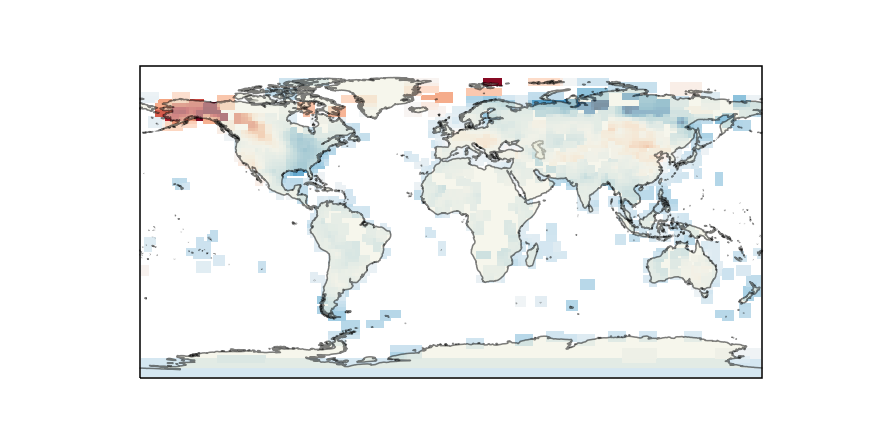

In [18]:
# preserve

fig = plt.figure(figsize=(8,4))

# Elegimos la proyección
ax = plt.axes(projection=ccrs.PlateCarree())

# Y lo que queremos representar en el mapa
coastline = NaturalEarthFeature(category='physical', name='coastline', scale='50m')

# ax.add_feature(land, color=cfeature.COLORS['land'])
ax.add_feature(coastline, facecolor=cfeature.COLORS['land'], edgecolor='k', alpha=0.5)

ax.pcolormesh(lon, lat, temp_anomaly, cmap='RdBu_r')

The data paints a picture of the localized, extreme temperature anomalies that happened during that month.
The eastern half of the United States was much colder than normal, while the western half and Alaska were much warmer.
Regions with no recorded temperature show the map background.

---

## Conclusiones

En este notebook hemos aprendido:
    
* Cómo pintar un mapa utilizando diferentes proyecciones
* Cómo añadis la información geográfica al mapa con distintos niveles de detalle
* Cómo representar datos de manera sencilla sobre el mapa
    
`cartopy` es capaz de muchas más cosas, por ejemplo:

* Cambios de coordenadas entre sistemas de referencia
* Superposición de imágenes adquiridas por satélite sobre el mapa

---
<br/>
<h4 align="right">¡Síguenos en Twitter!
<br/>
<p align="right"> <a href="https://twitter.com/AeroPython" class="twitter-follow-button" data-show-count="false">@AeroPython</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script> </p>
<p align="right"><a href="https://twitter.com/CAChemEorg" class="twitter-follow-button" data-show-count="false">@CAChemEorg</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script> </p>
<br/></h4>

###### Este notebook ha sido realizado por: [Álex Sáez](https://www.linkedin.com/in/alejandrosaezm/) y [Francisco Navarro](https://www.linkedin.com/in/fjnavarro/)
<br/>
##### <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es"><img alt="Licencia Creative Commons" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Curso de introducción a Python: procesamiento y análisis de datos</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Juan Luis Cano Rodriguez, Alejandro Sáez Mollejo y Francisco J. Navarro Brull</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es">Licencia Creative Commons Atribución 4.0 Internacional</a>.

###### La mayor parte de material de este curso es un resumen adaptado del magnífico [Curso de AeroPython](https://github.com/AeroPython/Curso_AeroPython)  realizado por: Juan Luis Cano  y Álex Sáez 